In [ ]:
pip install folium
pip install geopandas matplotlib

In [ ]:
import warnings
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import box
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

In [1]:
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)


# Correct file path (relative to the current directory)
file_path = 'criminal_acts.csv'

# Load the CSV file into a pandas DataFrame
criminal_acts_df = pd.read_csv(file_path)

criminal_acts_df.head()

,CATEGORIE,DATE,QUART,PDQ,X,Y,LONGITUDE,LATITUDE
0,Vol de véhicule à moteur,2018-09-13,jour,30.0,294904.159,5047548.921,-73.626778,45.567780
1,Vol de véhicule à moteur,2018-04-30,jour,30.0,294904.159,5047548.921,-73.626778,45.567780
2,Vol de véhicule à moteur,2018-09-01,nuit,7.0,290274.565,5042150.474,-73.685928,45.519122
3,Méfait,2017-07-21,jour,21.0,NaN,NaN,NaN,NaN
4,Méfait,2017-07-29,jour,12.0,NaN,NaN,NaN,NaN


The code installs mapping and plotting libraries, imports necessary modules, and suppresses specific pandas warnings. It then reads a CSV file containing criminal acts into a DataFrame and displays the first few records, setting up the environment for geospatial and statistical analysis.

In [2]:
# Assuming the DataFrame is already loaded as criminal_acts_df

# Display a summary of the DataFrame
print("Preview of the DataFrame:")
display(criminal_acts_df.head())

# Display information about the DataFrame
print("\nDataFrame Info:")
criminal_acts_df.info()

# Categorical columns
categorical_columns = ['CATEGORIE', 'DATE', 'QUART']  # Add any other categorical variables

# Unique values in categorical variables
print("\nUnique Values in Categorical Columns:")
unique_values_dict = {col: criminal_acts_df[col].nunique() for col in categorical_columns}
unique_values_df = pd.DataFrame(list(unique_values_dict.items()), columns=['Column', 'Unique Value Count'])
display(unique_values_df)

# Example of unique values for each categorical variable
example_values = {col: criminal_acts_df[col].unique()[:10] for col in categorical_columns}
example_values_df = pd.DataFrame.from_dict(example_values, orient='index').transpose()
example_values_df.columns = categorical_columns
display(example_values_df)

# Missing values in categorical variables
print("\nMissing Values in Categorical Columns:")
missing_values = criminal_acts_df[categorical_columns].isnull().sum()
missing_values_df = pd.DataFrame(missing_values, columns=['Missing Count']).reset_index()
missing_values_df.columns = ['Column', 'Missing Count']
display(missing_values_df)

# Distribution of each categorical variable
print("\nDistribution of Categorical Columns:")
for col in categorical_columns:
    value_counts = criminal_acts_df[col].value_counts().reset_index()
    value_counts.columns = [col, 'Count']
    print(f"\nDistribution of {col}:")
    display(value_counts)

# Contingency table between 'CATEGORIE' and 'QUART'
print("\nContingency Table Between 'CATEGORIE' and 'QUART':")
contingency_table = pd.crosstab(criminal_acts_df['CATEGORIE'], criminal_acts_df['QUART'])
contingency_table_df = contingency_table.reset_index()
display(contingency_table_df)


Preview of the DataFrame:


,CATEGORIE,DATE,QUART,PDQ,X,Y,LONGITUDE,LATITUDE
0,Vol de véhicule à moteur,2018-09-13,jour,30.0,294904.159,5047548.921,-73.626778,45.567780
1,Vol de véhicule à moteur,2018-04-30,jour,30.0,294904.159,5047548.921,-73.626778,45.567780
2,Vol de véhicule à moteur,2018-09-01,nuit,7.0,290274.565,5042150.474,-73.685928,45.519122
3,Méfait,2017-07-21,jour,21.0,NaN,NaN,NaN,NaN
4,Méfait,2017-07-29,jour,12.0,NaN,NaN,NaN,NaN



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306304 entries, 0 to 306303
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   CATEGORIE  306304 non-null  object 
 1   DATE       306304 non-null  object 
 2   QUART      306304 non-null  object 
 3   PDQ        306298 non-null  float64
 4   X          254541 non-null  float64
 5   Y          254541 non-null  float64
 6   LONGITUDE  254541 non-null  float64
 7   LATITUDE   254541 non-null  float64
dtypes: float64(5), object(3)
memory usage: 18.7+ MB

Unique Values in Categorical Columns:


,Column,Unique Value Count
0,CATEGORIE,6
1,DATE,3609
2,QUART,3


,CATEGORIE,DATE,QUART
0,Vol de véhicule à moteur,2018-09-13,jour
1,Méfait,2018-04-30,nuit
2,Vols qualifiés,2018-09-01,soir
3,Vol dans / sur véhicule à moteur,2017-07-21,None
4,Introduction,2017-07-29,None
5,Infractions entrainant la mort,2017-07-30,None
6,None,2017-08-01,None
7,None,2018-08-28,None
8,None,2018-01-10,None
9,None,2018-11-12,None



Missing Values in Categorical Columns:


,Column,Missing Count
0,CATEGORIE,0
1,DATE,0
2,QUART,0



Distribution of Categorical Columns:

Distribution of CATEGORIE:


,CATEGORIE,Count
0,Vol dans / sur véhicule à moteur,87724
1,Introduction,72679
2,Méfait,66546
3,Vol de véhicule à moteur,61596
4,Vols qualifiés,17481
5,Infractions entrainant la mort,278



Distribution of DATE:


,DATE,Count
0,2015-12-07,153
1,2017-09-05,152
2,2022-08-22,151
3,2015-10-13,148
4,2015-09-28,146
...,...,...
3604,2020-05-15,32
3605,2021-03-06,30
3606,2020-04-23,29
3607,2021-02-03,29



Distribution of QUART:


,QUART,Count
0,jour,156462
1,soir,100622
2,nuit,49220



Contingency Table Between 'CATEGORIE' and 'QUART':


QUART,CATEGORIE,jour,nuit,soir
0,Infractions entrainant la mort,59,94,125
1,Introduction,33064,13932,25683
2,Méfait,37017,8973,20556
3,Vol dans / sur véhicule à moteur,49040,8696,29988
4,Vol de véhicule à moteur,31546,14424,15626
5,Vols qualifiés,5736,3101,8644


The dataset comprises over 306,000 records spanning six crime categories, dates from 2015 to 2022, and three time periods—jour (day), soir (evening), and nuit (night). The majority of entries fall under “Vol dans / sur véhicule à moteur” (87,724), followed by “Introduction” (72,679) and “Méfait” (66,546). These categories are unevenly distributed across the three time segments: jour incidents are most common (156,462), followed by soir (100,622) and nuit (49,220).

Notably, spatial attributes (X, Y, LONGITUDE, LATITUDE) show substantial missingness. The contingency table between “CATEGORIE” and “QUART” reveals variations; for instance, “Vol de véhicule à moteur” peaks during the day with 31,546 events, whereas “Infractions entrainant la mort” occur more at night and evening. These patterns suggest certain crimes are time-dependent, highlighting temporal trends for targeted analysis or intervention.

In [3]:
# Assuming the DataFrame is already loaded as criminal_acts_df

# Group by 'DATE' and count the number of occurrences for each date
date_counts = criminal_acts_df.groupby('DATE').size().reset_index(name='Observation Count')

# Sort by 'Observation Count' in descending order
top_10_dates = date_counts.sort_values(by='Observation Count', ascending=False).head(10)

# Display the top 10 dates with the most observations
print("Top 10 Dates with the Most Observations Across All Categories:")
display(top_10_dates)


Top 10 Dates with the Most Observations Across All Categories:


,DATE,Observation Count
340,2015-12-07,153
978,2017-09-05,152
2790,2022-08-22,151
285,2015-10-13,148
270,2015-09-28,146
3364,2024-03-18,142
342,2015-12-09,141
594,2016-08-17,140
2118,2020-10-19,138
1803,2019-12-09,137


In [4]:
# Assuming the DataFrame is already loaded as criminal_acts_df

# Filter data for the specific category
category_filter = "Vol dans / sur véhicule à moteur"
filtered_data = criminal_acts_df[criminal_acts_df['CATEGORIE'] == category_filter]

# Group by 'DATE' and count the number of occurrences for each date
date_counts = filtered_data.groupby('DATE').size().reset_index(name='Observation Count')

# Sort by 'Observation Count' in descending order
top_10_dates = date_counts.sort_values(by='Observation Count', ascending=False).head(10)

# Display the top 10 dates with the most observations for the specific category
print(f"Top 10 Dates with the Most Observations for Category: '{category_filter}'")
display(top_10_dates)


Top 10 Dates with the Most Observations for Category: 'Vol dans / sur véhicule à moteur'


,DATE,Observation Count
231,2015-08-20,60
2118,2020-10-19,54
345,2015-12-12,53
978,2017-09-05,52
293,2015-10-21,52
2119,2020-10-20,52
3364,2024-03-18,51
285,2015-10-13,51
165,2015-06-15,51
144,2015-05-25,50


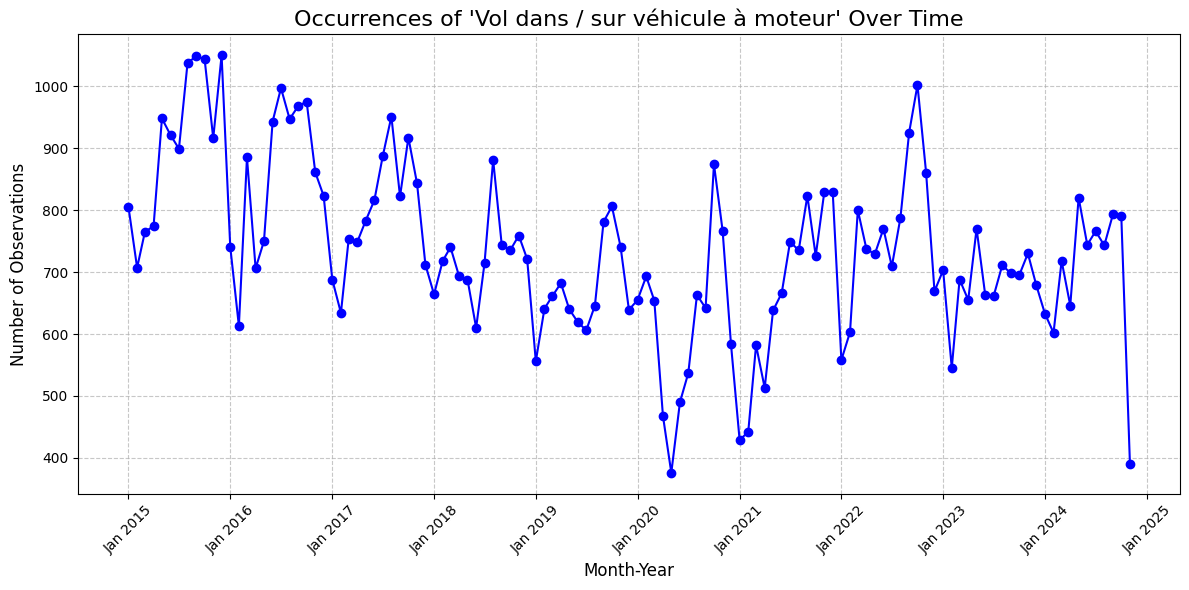

In [5]:
# Assuming the DataFrame is already loaded as criminal_acts_df

# Filter data for the specific category
category_filter = "Vol dans / sur véhicule à moteur"
filtered_data = criminal_acts_df[criminal_acts_df['CATEGORIE'] == category_filter]

# Convert the 'DATE' column to datetime format
filtered_data['DATE'] = pd.to_datetime(filtered_data['DATE'])

# Group by 'DATE' and count occurrences
date_counts = filtered_data.groupby(filtered_data['DATE'].dt.to_period('M')).size().reset_index(name='Observation Count')

# Convert the 'DATE' column back to datetime for plotting
date_counts['DATE'] = date_counts['DATE'].dt.to_timestamp()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(date_counts['DATE'], date_counts['Observation Count'], marker='o', linestyle='-', color='b')

# Format the x-axis to show Month-Year
date_format = DateFormatter("%b %Y")
plt.gca().xaxis.set_major_formatter(date_format)

plt.title("Occurrences of 'Vol dans / sur véhicule à moteur' Over Time", fontsize=16)
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Number of Observations", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


The graph shows some correlation between public policy decisions, specifically curfews, and the observed trends in theft occurrences. Here’s how these policies align with the data:

January 2020 Decline:

The sharp decline in thefts in early 2020 coincides with the COVID-19 pandemic's initial restrictions and the imposition of curfews or reduced public activity. These policies likely limited opportunities for theft as fewer people were out and vehicle activity decreased.
January–May 2021 Curfew:

When hospitalizations exceeded 1,000, a curfew from January 9 to May 28, 2021, may have contributed to suppressed theft activity. The graph shows a lower level of incidents during this period, reflecting reduced nighttime activity when thefts are more likely.
December 31, 2021–January 17, 2022:

The brief curfew in early 2022 could explain the dip in theft occurrences during this time, aligning with policy-induced limitations on mobility.
Overall, the graph suggests a relationship between theft trends and public policies, particularly curfews that reduce mobility and theft opportunities. Further analysis with exact theft times and contextual data (e.g., enforcement levels) could confirm these links

Vol de véhicule à moteur

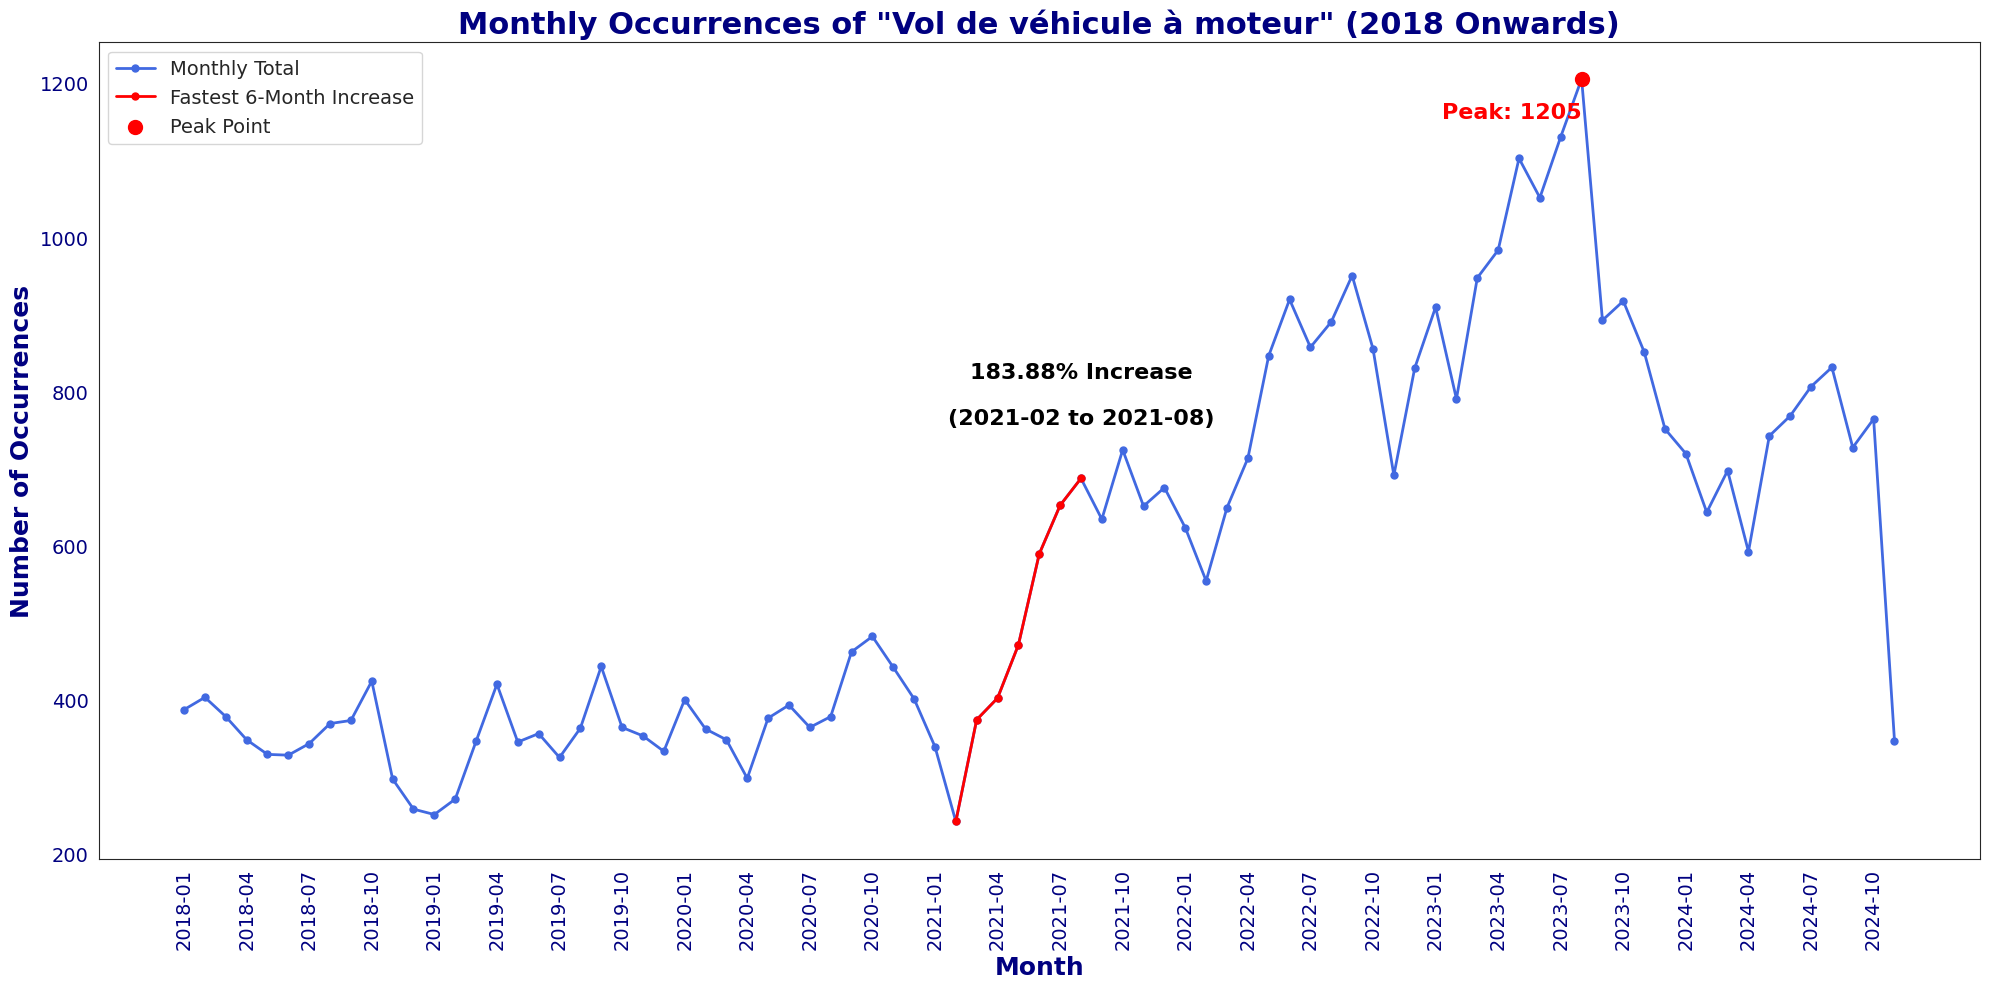

In [29]:
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

# Load the CSV file into a pandas DataFrame
file_path = 'criminal_acts.csv'
criminal_acts_df = pd.read_csv(file_path)

# Convert the DATE column to datetime
criminal_acts_df['DATE'] = pd.to_datetime(criminal_acts_df['DATE'])

# Filter for 'Vol de véhicule à moteur' category and data from 2018 onwards
vehicle_theft_df = criminal_acts_df[
    (criminal_acts_df['CATEGORIE'] == 'Vol de véhicule à moteur') &
    (criminal_acts_df['DATE'] >= '2018-01-01')
]

# Aggregate data by month
vehicle_theft_df['MONTH'] = vehicle_theft_df['DATE'].dt.to_period('M')
monthly_theft_counts = vehicle_theft_df.groupby('MONTH').size()

# Convert monthly counts to DataFrame for easier manipulation
monthly_theft_df = monthly_theft_counts.reset_index(name='Counts')

# Calculate the percentage increase over 6 months
monthly_theft_df['6M_Pct_Change'] = (
    (monthly_theft_df['Counts'] - monthly_theft_df['Counts'].shift(6)) /
    monthly_theft_df['Counts'].shift(6)
) * 100

# Find the 6-month period with the highest percentage increase
max_6m_increase = monthly_theft_df['6M_Pct_Change'].max()
max_6m_index = monthly_theft_df['6M_Pct_Change'].idxmax()

# Get the start and end months for the highlighted period
start_month = monthly_theft_df.loc[max_6m_index - 6, 'MONTH'] if max_6m_index >= 6 else monthly_theft_df.loc[0, 'MONTH']
end_month = monthly_theft_df.loc[max_6m_index, 'MONTH']

# Extract data for the highlighted 6-month period
highlighted_months = monthly_theft_df.loc[max_6m_index - 6:max_6m_index, 'MONTH'].astype(str)
highlighted_counts = monthly_theft_df.loc[max_6m_index - 6:max_6m_index, 'Counts']

# Find the peak point within the dataset
peak_value = monthly_theft_counts.max()
peak_month = monthly_theft_counts.idxmax()
peak_month_str = str(peak_month)

# Set Seaborn style
sns.set_style("white")

# Create the plot
plt.figure(figsize=(20, 10))

# Plot the entire data in blue
plt.plot(
    monthly_theft_counts.index.astype(str),
    monthly_theft_counts.values,
    color='royalblue',
    linewidth=2,
    marker='o',
    markersize=5,
    label='Monthly Total'
)

# Highlight the 6-month period with the highest percentage increase in red
plt.plot(
    highlighted_months,
    highlighted_counts,
    color='red',
    linewidth=2,
    marker='o',
    markersize=5,
    label='Fastest 6-Month Increase'
)

# Annotate the percentage increase and 6-month period
plt.text(
    highlighted_months.iloc[-1],  # Last month in the highlighted period
    highlighted_counts.iloc[-1] + 70,  # Adjusted position for better visibility
    f'{max_6m_increase:.2f}% Increase\n\n({start_month} to {end_month})',
    fontsize=16,
    fontweight='bold',
    color='black',
    ha='center'
)

# Add a red dot at the peak
plt.scatter(
    peak_month_str,
    peak_value,
    color='red',
    s=100,
    zorder=5,
    label='Peak Point'
)

# Annotate the peak point with the number of observations, moved to the left
plt.text(
    monthly_theft_df.loc[monthly_theft_df['MONTH'] == peak_month, 'MONTH'].astype(str).values[0], 
    peak_value - 50,  # Adjusted position vertically
    f'Peak: {peak_value}',
    fontsize=16,
    fontweight='bold',
    color='red',
    ha='right'  # Align text to the right
)

# Add a title and labels
plt.title('Monthly Occurrences of "Vol de véhicule à moteur" (2018 Onwards)', fontsize=22, fontweight='bold', color='navy')
plt.xlabel('Month', fontsize=18, fontweight='bold', color='navy')
plt.ylabel('Number of Occurrences', fontsize=18, fontweight='bold', color='navy')

# Customize x-axis ticks to display every 3rd month
x_ticks = monthly_theft_counts.index[::3].astype(str)
plt.xticks(ticks=x_ticks, labels=x_ticks, fontsize=14, rotation=90, color='navy')

plt.yticks(fontsize=14, color='navy')
plt.legend(fontsize=14, loc='upper left')

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()


The code analyzes motor vehicle theft data from 2018 onward. It reads a CSV, converts dates, and filters for relevant thefts. Data is grouped monthly, counting occurrences per month. A six-month percentage change is calculated for each period to identify the interval with the highest increase. The code then finds the peak theft month overall. Using Seaborn and Matplotlib, it plots monthly counts, highlights the six-month period of fastest growth in red, and marks the peak with a red dot. Annotated labels display the percentage increase, period dates, and peak count, providing clear visual insight into crime trends.

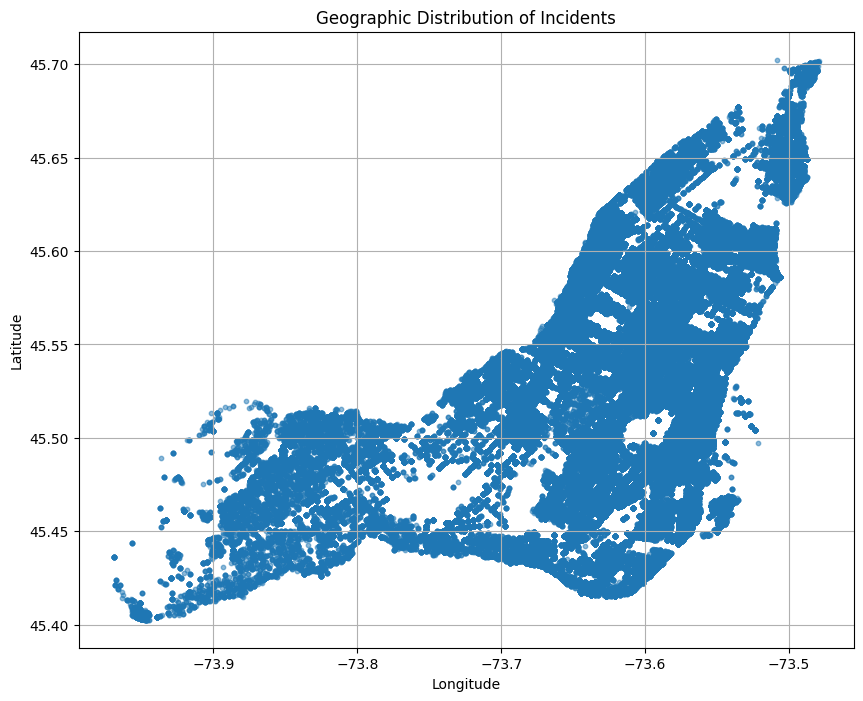

In [2]:
# Ignore SettingWithCopyWarning warnings
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

# Load the CSV file into a pandas DataFrame
file_path = 'criminal_acts.csv'
criminal_acts_df = pd.read_csv(file_path)

# Filter data to include only rows with valid latitude and longitude values
valid_geographic_data = criminal_acts_df.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Plot the geographic distribution of incidents
plt.figure(figsize=(10, 8))
plt.scatter(valid_geographic_data['LONGITUDE'], valid_geographic_data['LATITUDE'], alpha=0.5, s=10)
plt.title('Geographic Distribution of Incidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


In [9]:
geojson_file = "limites-administratives-agglomeration-nad83.geojson"  # Use the relative path


/tmp/ipykernel_172/668996313.py:59: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc="upper right", title="Legend")


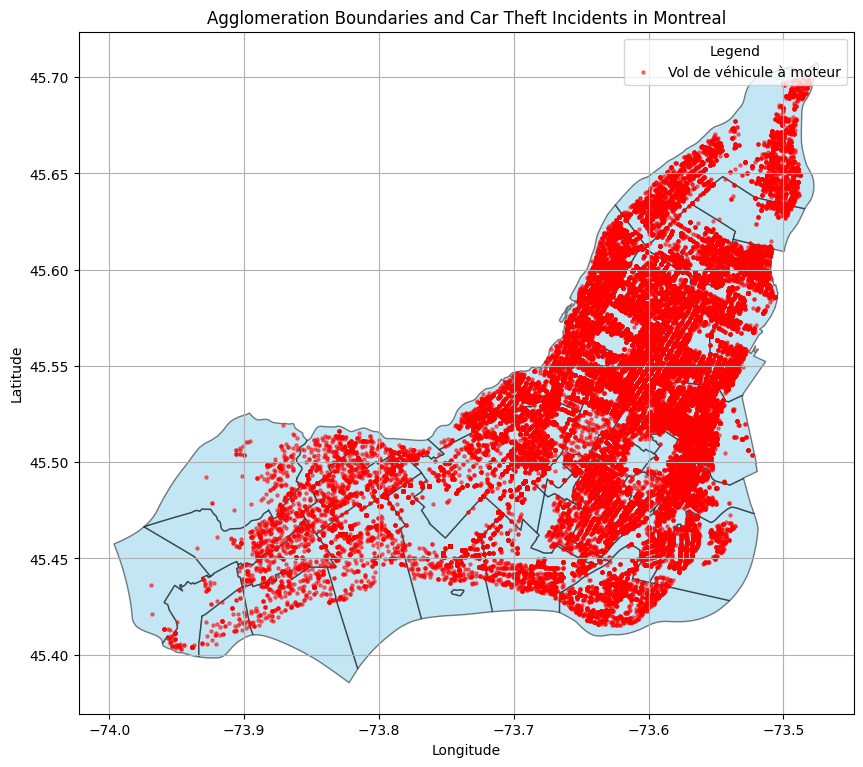

In [3]:
# Ignore SettingWithCopyWarning warnings
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

# File paths
geojson_file = "limites-administratives-agglomeration-nad83.geojson"
file_path = "criminal_acts.csv"

# Load the GeoJSON file for the agglomeration boundaries with error handling
try:
    geo_data = gpd.read_file(geojson_file)
except Exception as e:
    print(f"Error loading GeoJSON file: {e}")
    exit()

# Ensure the GeoDataFrame is in EPSG:4326 (WGS84) CRS
geo_data = geo_data.to_crs(epsg=4326)

# Load the CSV file into a pandas DataFrame with error handling
try:
    criminal_acts_df = pd.read_csv(file_path)
except Exception as e:
    print(f"Error loading CSV file: {e}")
    exit()

# Filter data to include only rows with valid latitude and longitude values
valid_geographic_data = criminal_acts_df.dropna(subset=["LATITUDE", "LONGITUDE"])

# Filter incidents for "Vol de véhicule à moteur" under the variable CATEGORIE
car_thefts_df = valid_geographic_data.query("CATEGORIE == 'Vol de véhicule à moteur'")

# Dynamic marker size based on the number of points
marker_size = max(5, min(100, 10000 // max(len(car_thefts_df), 1)))

# Plot both datasets on the same figure
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the agglomeration boundaries
geo_data.plot(ax=ax, color="skyblue", edgecolor="black", alpha=0.5, label="Agglomeration Boundaries")

# Plot the filtered car theft points
ax.scatter(
    car_thefts_df["LONGITUDE"], 
    car_thefts_df["LATITUDE"], 
    color="red", 
    alpha=0.5, 
    s=marker_size, 
    label="Vol de véhicule à moteur"
)

# Add a title, labels, legend, and grid
plt.title("Agglomeration Boundaries and Car Theft Incidents in Montreal")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="upper right", title="Legend")
plt.grid(True)

# Save the plot to a file
plt.savefig("car_theft_map.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


The visualization portion of the script creates a matplotlib figure and axes. It plots the agglomeration boundaries from the GeoJSON with a semi-transparent sky-blue color and outlines, then overlays the car theft incidents as red scatter points, using the dynamically determined marker size.

Additional enhancements include setting a title, axis labels, a legend to describe the plotted layers, and a grid for better readability. Finally, the script saves the figure as a high-resolution PNG file and displays the plot.

Highest theft count: 1002
Centroid of the 1 km² cell in WGS84: Lat=45.461897, Lon=-73.824176


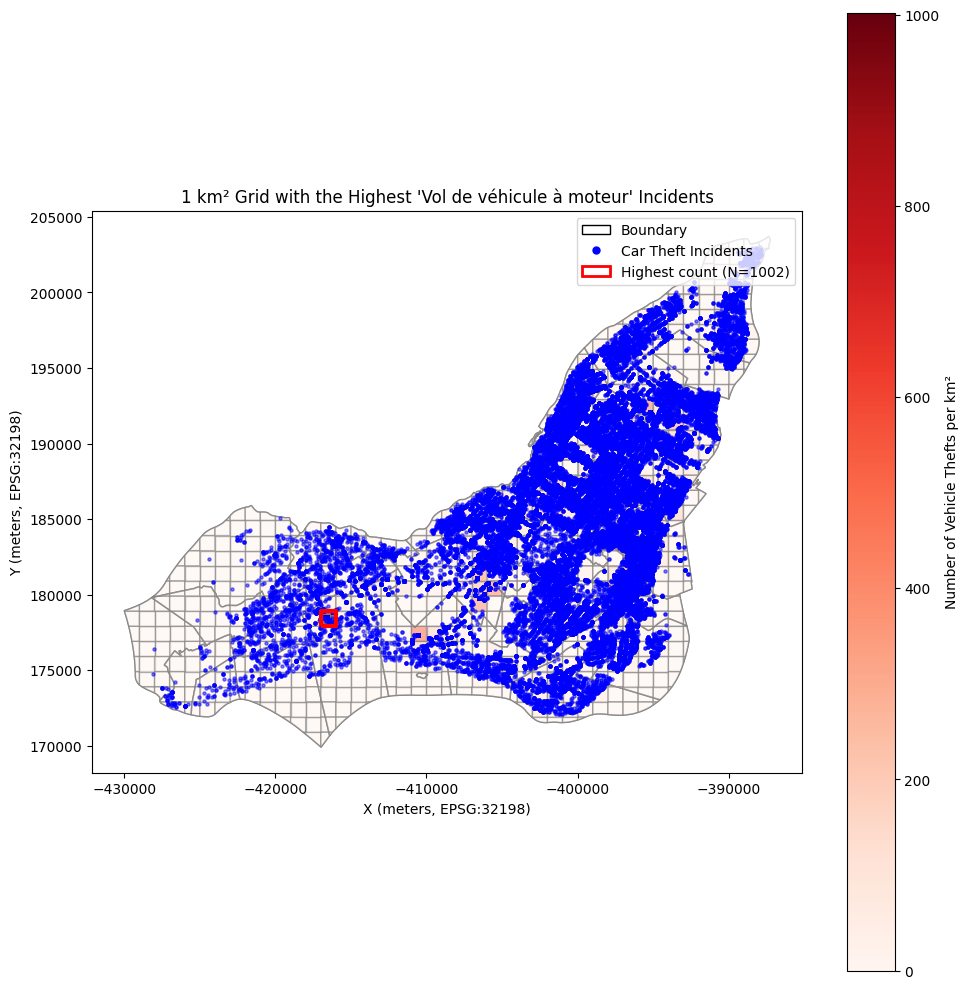

In [1]:
# Ignore SettingWithCopyWarning warnings
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

# -----------------------------------------------------------------------------
# 1. LOAD DATA
# -----------------------------------------------------------------------------
geojson_file = "limites-administratives-agglomeration-nad83.geojson"
csv_file = "criminal_acts.csv"

# Load administrative boundary
try:
    geo_data = gpd.read_file(geojson_file)
except Exception as e:
    print(f"Error loading GeoJSON file: {e}")
    exit()

# Load crime data
try:
    criminal_acts_df = pd.read_csv(csv_file)
except Exception as e:
    print(f"Error loading CSV file: {e}")
    exit()

# -----------------------------------------------------------------------------
# 2. FILTER CRIME DATA (Vol de véhicule à moteur)
# -----------------------------------------------------------------------------
# Keep only rows with valid lat/lon
criminal_acts_df = criminal_acts_df.dropna(subset=["LATITUDE", "LONGITUDE"])
# Filter for "Vol de véhicule à moteur"
car_thefts_df = criminal_acts_df.query("CATEGORIE == 'Vol de véhicule à moteur'")

# -----------------------------------------------------------------------------
# 3. CREATE GEODATAFRAMES & REPROJECT
# -----------------------------------------------------------------------------
# Convert boundary to WGS84, then to EPSG:32198 (Lambert projection for Quebec)
geo_data = geo_data.to_crs(epsg=4326).to_crs(epsg=32198)

# Convert car thefts to a GeoDataFrame in EPSG:4326, then reproject to EPSG:32198
car_thefts_gdf = gpd.GeoDataFrame(
    car_thefts_df,
    geometry=gpd.points_from_xy(car_thefts_df["LONGITUDE"], car_thefts_df["LATITUDE"]),
    crs="EPSG:4326"
).to_crs(epsg=32198)

# -----------------------------------------------------------------------------
# 4. CREATE A 1 KM x 1 KM FISHNET (GRID)
# -----------------------------------------------------------------------------
# Determine bounding box for the entire administrative boundary
minx, miny, maxx, maxy = geo_data.total_bounds

# Grid size (1 km = 1000 meters in Lambert projection)
grid_size = 1000.0

# Generate a list of polygons (1x1 km) covering the bounding box
polygons = []
x = minx
while x < maxx:
    y = miny
    x_right = min(x + grid_size, maxx)
    while y < maxy:
        y_top = min(y + grid_size, maxy)
        polygons.append(box(x, y, x_right, y_top))
        y += grid_size
    x += grid_size

grid_gdf = gpd.GeoDataFrame(geometry=polygons, crs=geo_data.crs)

# (Optional) Intersect grid with boundary if you only want squares inside the admin area
grid_gdf = gpd.overlay(grid_gdf, geo_data, how='intersection')

# -----------------------------------------------------------------------------
# 5. SPATIAL JOIN: COUNT THEFTS PER 1KM GRID CELL
# -----------------------------------------------------------------------------
# Each theft point will be matched to the cell it falls within
joined = gpd.sjoin(car_thefts_gdf, grid_gdf, how='left', predicate='within')

# Count how many thefts per cell (index_right is the cell's index in the grid)
counts_per_cell = joined.groupby("index_right").size().rename("theft_count")

# Attach that count to the grid
grid_gdf["theft_count"] = grid_gdf.index.map(counts_per_cell).fillna(0).astype(int)

# -----------------------------------------------------------------------------
# 6. IDENTIFY THE SQUARE WITH THE HIGHEST THEFT COUNT
# -----------------------------------------------------------------------------
max_cell_index = grid_gdf["theft_count"].idxmax()
max_theft_count = grid_gdf.loc[max_cell_index, "theft_count"]
max_cell = grid_gdf.loc[[max_cell_index]]  # as a GeoDataFrame

# -----------------------------------------------------------------------------
# 7. OBTAIN LATITUDE/LONGITUDE OF THIS SQUARE'S CENTROID
# -----------------------------------------------------------------------------
# First compute the centroid in the projected CRS (EPSG:32198)
max_cell_proj = max_cell.to_crs(epsg=32198)
centroid_proj = max_cell_proj.geometry.centroid.iloc[0]

# Convert that centroid to WGS84
centroid_wgs84 = gpd.GeoSeries([centroid_proj], crs="EPSG:32198").to_crs(epsg=4326)
centroid_lat = centroid_wgs84.geometry.iloc[0].y
centroid_lon = centroid_wgs84.geometry.iloc[0].x

print(f"Highest theft count: {max_theft_count}")
print(f"Centroid of the 1 km² cell in WGS84: Lat={centroid_lat:.6f}, Lon={centroid_lon:.6f}")

# -----------------------------------------------------------------------------
# 8. PLOT THE RESULTS: SHOW GRID + THEFT POINTS + RED OUTLINE AROUND MAX CELL
# -----------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the administrative boundary (no label to avoid PatchCollection in legend)
geo_data.plot(ax=ax, color="white", edgecolor="black", alpha=0.5)

# Plot the grid, colored by theft_count
grid_plot = grid_gdf.plot(
    ax=ax,
    column="theft_count",
    cmap="Reds",
    legend=True,  # We'll create a colorbar
    alpha=0.6,
    edgecolor="grey",
    legend_kwds={"label": "Number of Vehicle Thefts per km²"}
)

# Plot the theft points (no label to avoid PatchCollection legend warning)
car_thefts_gdf.plot(
    ax=ax,
    color="blue",
    markersize=5,
    alpha=0.5
)

# Highlight the top cell with a red outline (no fill)
max_cell.plot(
    ax=ax,
    facecolor="none",
    edgecolor="red",
    linewidth=3
)

ax.set_title("1 km² Grid with the Highest 'Vol de véhicule à moteur' Incidents")
ax.set_xlabel("X (meters, EPSG:32198)")
ax.set_ylabel("Y (meters, EPSG:32198)")

# -----------------------------------------------------------------------------
# CREATE A MANUAL LEGEND FOR NON-COLORBAR ITEMS
# -----------------------------------------------------------------------------
# 1) Boundary - white fill, black edge
boundary_patch = mpatches.Patch(facecolor='white', edgecolor='black', label='Boundary')

# 2) Theft incidents - blue marker
theft_marker = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
                             markersize=5, label='Car Theft Incidents')

# 3) Max cell highlight - red outline
max_patch = mpatches.Patch(facecolor='none', edgecolor='red', linewidth=2,
                           label=f'Highest count (N={max_theft_count})')

ax.legend(handles=[boundary_patch, theft_marker, max_patch], loc="upper right")

plt.tight_layout()
plt.show()


The script performs a geospatial analysis to pinpoint the area with the highest concentration of car thefts within an administrative boundary. It starts by loading administrative boundaries (GeoJSON) and crime data (CSV), filtering for valid locations and specifically for car theft incidents. The data is reprojected to a Lambert coordinate system (EPSG:32198) suitable for the region.

A 1 km² grid (fishnet) is generated over the boundary, and a spatial join assigns each car theft incident to its corresponding grid cell. The script counts thefts per cell, identifies the cell with the highest count, computes its centroid in WGS84 coordinates, and prints the highest theft count along with the centroid's latitude and longitude.

Finally, it visualizes the administrative boundary, the grid colored by theft intensity, all theft points, and highlights the hotspot cell with a red outline, providing a clear graphical representation of the data analysis.